In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV


# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [148]:
# Read each CSV file into separate DataFrames
df1 = pd.read_csv('1996_data.csv')
df2 = pd.read_csv('2000_data.csv')
df3 = pd.read_csv('2002_data.csv')
df4 = pd.read_csv('2003_data.csv')
df5 = pd.read_csv('2007_data.csv')

# Merge the DataFrames
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Save the merged DataFrame to a new CSV file
df.to_csv('merged_file.csv', index=False)

In [149]:
df_encoded = df.copy()

label_encoder = LabelEncoder()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':  #To Check if the column is categorical
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

In [150]:
df_encoded

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,...,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,delayed
0,1996,12,15,7,1605.0,0,1804.0,0,1,1481,...,16,0,4,0,NaN,NaN,NaN,NaN,NaN,1
1,1996,2,5,1,1242.0,1240,1533.0,1541,19,286,...,10,0,4,0,NaN,NaN,NaN,NaN,NaN,1
2,1996,12,28,6,1335.0,1330,1606.0,1610,7,1183,...,8,0,4,0,NaN,NaN,NaN,NaN,NaN,1
3,1996,12,10,2,857.0,0,1117.0,0,1,1689,...,12,0,4,0,NaN,NaN,NaN,NaN,NaN,0
4,1996,10,5,6,1420.0,1420,1459.0,1505,21,1364,...,9,0,4,0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2007,2,19,1,825.0,835,950.0,1008,8,4558,...,12,0,4,0,0.0,0.0,0.0,0.0,0.0,0
149996,2007,5,3,4,1242.0,1246,1425.0,1428,15,5561,...,11,0,4,0,0.0,0.0,0.0,0.0,0.0,0
149997,2007,5,19,6,1000.0,1005,1058.0,1055,13,4220,...,10,0,4,0,0.0,0.0,0.0,0.0,0.0,1
149998,2007,6,17,7,2143.0,2000,2231.0,2055,13,4554,...,10,0,4,0,8.0,0.0,0.0,0.0,88.0,1


In [151]:
df_encoded.dtypes

year                   int64
month                  int64
dayofmonth             int64
dayofweek              int64
deptime              float64
crsdeptime             int64
arrtime              float64
crsarrtime             int64
uniquecarrier          int32
flightnum              int64
tailnum                int32
actualelapsedtime    float64
crselapsedtime       float64
airtime              float64
arrdelay             float64
depdelay             float64
origin                 int32
dest                   int32
distance               int64
taxiin                 int64
taxiout                int64
cancelled              int64
cancellationcode       int32
diverted               int64
carrierdelay         float64
weatherdelay         float64
nasdelay             float64
securitydelay        float64
lateaircraftdelay    float64
delayed                int32
dtype: object

In [152]:
df_encoded.isnull().sum()

year                      0
month                     0
dayofmonth                0
dayofweek                 0
deptime                3167
crsdeptime                0
arrtime                3495
crsarrtime                0
uniquecarrier             0
flightnum                 0
tailnum                   0
actualelapsedtime      3495
crselapsedtime           23
airtime                3495
arrdelay               3495
depdelay               3167
origin                    0
dest                      0
distance                  0
taxiin                    0
taxiout                   0
cancelled                 0
cancellationcode          0
diverted                  0
carrierdelay         102288
weatherdelay         102288
nasdelay             102288
securitydelay        102288
lateaircraftdelay    102288
delayed                   0
dtype: int64

In [153]:
numerical_cols = ['deptime', 'arrtime', 'actualelapsedtime', 'crselapsedtime', 'airtime', 'arrdelay', 'depdelay']
for col in numerical_cols:
    df_encoded[col].fillna(df_encoded[col].median(), inplace=True)

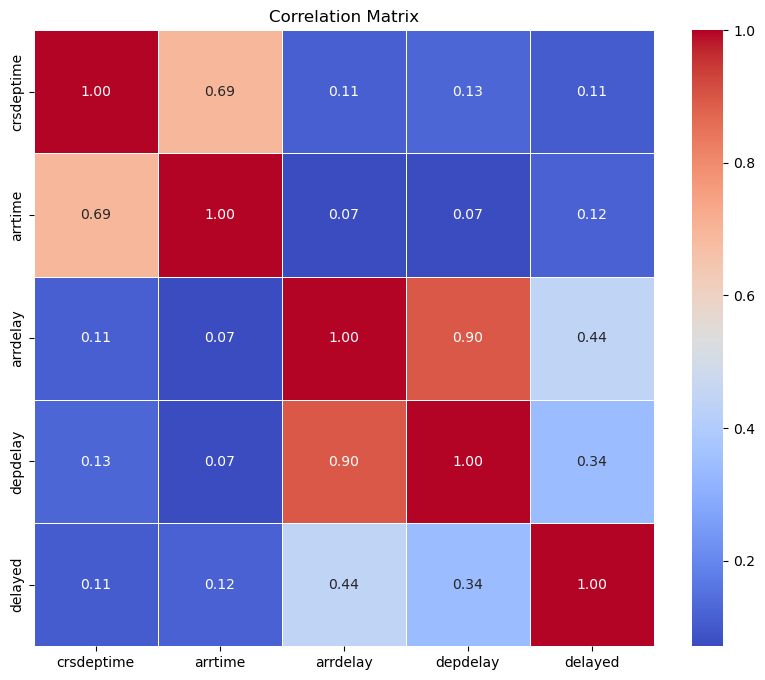

In [156]:
correlation_matrix = df_encoded[['crsdeptime', 'arrtime', 'arrdelay', 'depdelay', 'delayed']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [157]:
#Droping columns with a large number of missing values
df_encoded.drop(columns=['carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay','cancellationcode', 'arrdelay', 'depdelay'], inplace=True)
#To Check if there are any remaining missing values
print(df_encoded.isnull().sum())

year                 0
month                0
dayofmonth           0
dayofweek            0
deptime              0
crsdeptime           0
arrtime              0
crsarrtime           0
uniquecarrier        0
flightnum            0
tailnum              0
actualelapsedtime    0
crselapsedtime       0
airtime              0
origin               0
dest                 0
distance             0
taxiin               0
taxiout              0
cancelled            0
diverted             0
delayed              0
dtype: int64


In [158]:
df_encoded

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,...,crselapsedtime,airtime,origin,dest,distance,taxiin,taxiout,cancelled,diverted,delayed
0,1996,12,15,7,1605.0,0,1804.0,0,1,1481,...,114.0,80.0,19,187,595,23,16,0,0,1
1,1996,2,5,1,1242.0,1240,1533.0,1541,19,286,...,121.0,96.0,81,248,794,5,10,0,0,1
2,1996,12,28,6,1335.0,1330,1606.0,1610,7,1183,...,100.0,75.0,272,19,483,8,8,0,0,1
3,1996,12,10,2,857.0,0,1117.0,0,1,1689,...,262.0,242.0,212,269,1726,6,12,0,0,0
4,1996,10,5,6,1420.0,1420,1459.0,1505,21,1364,...,105.0,85.0,49,35,588,5,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2007,2,19,1,825.0,835,950.0,1008,8,4558,...,93.0,56.0,104,19,331,17,12,0,0,0
149996,2007,5,3,4,1242.0,1246,1425.0,1428,15,5561,...,102.0,82.0,122,164,461,10,11,0,0,0
149997,2007,5,19,6,1000.0,1005,1058.0,1055,13,4220,...,50.0,34.0,119,211,174,14,10,0,0,1
149998,2007,6,17,7,2143.0,2000,2231.0,2055,13,4554,...,55.0,35.0,38,29,201,3,10,0,0,1


In [159]:
#Spliting the dataset into Training and Testing sets
X = df_encoded.drop(columns=['delayed'])
y = df_encoded['delayed']

In [93]:
# split the data in train validate test in 70:15:15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=123)

In [50]:
xgb = XGBClassifier(
    learning_rate=0.01,         # Adjust the learning rate
    max_depth=15,               # Adjust the maximum depth
    n_estimators=1500,          # Adjust the number of trees
    subsample=0.8,              # Adjust subsample
    colsample_bytree=0.8,       # Adjust colsample_bytree
    reg_alpha=0.1,              # Adjust L1 regularization
    reg_lambda=0.1,             # Adjust L2 regularization
    gamma=0.1,                  # Adjust the gamma parameter
    objective='binary:logistic' # Change the objective function
)

xgb.fit(X_train, y_train)

# Make predictions on the validation set
predictions_val = xgb.predict(X_val)

# Calculate the accuracy score for the validation set
accuracy_val = accuracy_score(y_val, predictions_val)
print("Validation Accuracy:", accuracy_val)

# Fine-tune the XGBoost model using hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(xgb, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Make predictions on the test set using the best model
predictions_test = grid_search.best_estimator_.predict(X_test)

# Calculate the accuracy score for the test set using the best model
accuracy_test = accuracy_score(y_test, predictions_test)
print("Test Accuracy after hyperparameter tuning:", accuracy_test)

# Generate and print the classification report
report = classification_report(y_test, predictions_test)
print("Classification Report:")
print(report)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_test)
print("Confusion Matrix:")
print(conf_matrix)



Validation Accuracy: 0.9016993464052288
Test Accuracy after hyperparameter tuning: 0.8940444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      9909
           1       0.93      0.88      0.90     12591

    accuracy                           0.89     22500
   macro avg       0.89      0.90      0.89     22500
weighted avg       0.90      0.89      0.89     22500

Confusion Matrix:
[[ 9027   882]
 [ 1502 11089]]


In [105]:
import xgboost as xgb
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(
    learning_rate=0.01,
    max_depth=15,
    n_estimators=1500,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    gamma=0.1,
    objective='binary:logistic'
)

model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Score:", accuracy)

# Calculate precision score
precision = precision_score(y_test, predictions)
print("Precision Score:", precision)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)


Accuracy Score: 0.9058666666666667
Precision Score: 0.9338289962825279
Confusion Matrix:
[[12104  1068]
 [ 1756 15072]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     13172
           1       0.93      0.90      0.91     16828

    accuracy                           0.91     30000
   macro avg       0.90      0.91      0.90     30000
weighted avg       0.91      0.91      0.91     30000



In [51]:
gradient_boost = GradientBoostingClassifier(
    n_estimators=100,       # Number of boosting stages
    learning_rate=0.1,      # Learning rate
    max_depth=3,            # Maximum depth of individual trees
    min_samples_split=2,    # Minimum number of samples required to split an internal node
    min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node
    random_state=42         # Random state for reproducibility
)

# Train the classifier
gradient_boost.fit(X_train, y_train)

# Make predictions on the validation set
predictions_val = gradient_boost.predict(X_val)

# Calculate accuracy on the validation set
accuracy_val = accuracy_score(y_val, predictions_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on the testing set
predictions_test = gradient_boost.predict(X_test)

# Calculate accuracy on the testing set
accuracy_test = accuracy_score(y_test, predictions_test)
print("Test Accuracy:", accuracy_test)

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, predictions_test))

# Generate and print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_test))

Validation Accuracy: 0.7277908496732026
Test Accuracy: 0.7233777777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      9909
           1       0.74      0.77      0.76     12591

    accuracy                           0.72     22500
   macro avg       0.72      0.72      0.72     22500
weighted avg       0.72      0.72      0.72     22500

Confusion Matrix:
[[6524 3385]
 [2839 9752]]


In [55]:
decision_tree = DecisionTreeClassifier(random_state=123)

# Train the decision tree classifier on the training set
decision_tree.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = decision_tree.predict(X_val)

# Calculate the accuracy score for the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Fine-tune the decision tree classifier using hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(decision_tree, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Make predictions on the validation set using the best model
y_pred_val = grid_search.best_estimator_.predict(X_val)

# Calculate the accuracy score for the validation set using the best model
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy after hyperparameter tuning:", accuracy_val)

# Make predictions on the test set using the best model
y_pred_test = grid_search.best_estimator_.predict(X_test)

# Calculate the accuracy score for the test set using the best model
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy after hyperparameter tuning:", accuracy_test)

Validation Accuracy: 0.7178562091503268
Validation Accuracy after hyperparameter tuning: 0.7328627450980392
Test Accuracy after hyperparameter tuning: 0.734


In [56]:
random_forest = RandomForestClassifier(
    n_estimators=200,       # Number of trees in the forest
    max_depth=10,            # Maximum depth of the tree
    min_samples_split=4,    # Minimum number of samples required to split an internal node
    min_samples_leaf=2,     # Minimum number of samples required to be at a leaf node
    random_state=84         # Random state for reproducibility
)

# Train the classifier
random_forest.fit(X_train, y_train)

# Make predictions on the validation set
predictions_val = random_forest.predict(X_val)

# Calculate accuracy on the validation set
accuracy_val = accuracy_score(y_val, predictions_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on the testing set
predictions_test = random_forest.predict(X_test)

# Calculate accuracy on the testing set
accuracy_test = accuracy_score(y_test, predictions_test)
print("Test Accuracy:", accuracy_test)

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, predictions_test))

# Generate and print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_test))

Validation Accuracy: 0.6993986928104575
Test Accuracy: 0.6986666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.57      0.63      9909
           1       0.70      0.80      0.75     12591

    accuracy                           0.70     22500
   macro avg       0.70      0.69      0.69     22500
weighted avg       0.70      0.70      0.69     22500

Confusion Matrix:
[[ 5697  4212]
 [ 2568 10023]]


In [94]:
svc = SVC(
    C=1.0,               # Penalty parameter C
    kernel='rbf',        # Kernel type
    gamma='scale',       # Kernel coefficient for 'rbf'
    degree=3,            # Degree of the polynomial kernel function ('poly')
    class_weight=None,   # Class weights
    random_state=42      # Random state for reproducibility
)

# Train the classifier on the training set
svc.fit(X_train, y_train)

# Make predictions on the validation set
predictions_val = svc.predict(X_val)

# Calculate accuracy on the validation set
accuracy_val = accuracy_score(y_val, predictions_val)
print("Validation Accuracy:", accuracy_val)

# Generate and print confusion matrix for validation set
conf_matrix_val = confusion_matrix(y_val, predictions_val)
print("Confusion Matrix (Validation Set):\n", conf_matrix_val)

# Generate and print classification report for validation set
class_report_val = classification_report(y_val, predictions_val)
print("Classification Report (Validation Set):\n", class_report_val)

Validation Accuracy: 0.6094117647058823
Confusion Matrix (Validation Set):
 [[2561 5758]
 [1712 9094]]
Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.60      0.31      0.41      8319
           1       0.61      0.84      0.71     10806

    accuracy                           0.61     19125
   macro avg       0.61      0.57      0.56     19125
weighted avg       0.61      0.61      0.58     19125



### Target Data Prediction

In [107]:
data = pd.read_csv('Target_data.csv')

In [108]:
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed
0,1995,1,20,5,644,645,957,937,UA,482,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
1,1988,1,22,5,700,700,747,755,AS,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
2,2006,1,27,5,803,815,924,1000,US,103,...,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,?
3,1995,1,27,5,645,645,929,937,UA,482,...,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
4,1988,1,29,5,700,700,750,755,AS,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
5,1988,1,2,6,705,700,759,755,AS,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
6,2006,1,7,6,1450,1455,1640,1650,WN,2742,...,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,?
7,1995,1,7,6,648,645,938,937,UA,482,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
8,1988,1,9,6,700,700,750,755,AS,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?
9,1995,1,14,6,644,645,938,937,UA,482,...,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,?


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               10 non-null     int64  
 1   Month              10 non-null     int64  
 2   DayofMonth         10 non-null     int64  
 3   DayOfWeek          10 non-null     int64  
 4   DepTime            10 non-null     int64  
 5   CRSDepTime         10 non-null     int64  
 6   ArrTime            10 non-null     int64  
 7   CRSArrTime         10 non-null     int64  
 8   UniqueCarrier      10 non-null     object 
 9   FlightNum          10 non-null     int64  
 10  TailNum            6 non-null      object 
 11  ActualElapsedTime  10 non-null     int64  
 12  CRSElapsedTime     10 non-null     int64  
 13  AirTime            6 non-null      float64
 14  ArrDelay           0 non-null      float64
 15  DepDelay           0 non-null      float64
 16  Origin             10 non-nul

In [110]:
df_encoded = data.copy()

label_encoder = LabelEncoder()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':  #To Check if the column is categorical
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

In [111]:
df_encoded.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime                int64
CRSDepTime             int64
ArrTime                int64
CRSArrTime             int64
UniqueCarrier          int32
FlightNum              int64
TailNum                int32
ActualElapsedTime      int64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                 int32
Dest                   int32
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode     float64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Delayed                int32
dtype: object

In [112]:
df_encoded.isnull().sum()

Year                  0
Month                 0
DayofMonth            0
DayOfWeek             0
DepTime               0
CRSDepTime            0
ArrTime               0
CRSArrTime            0
UniqueCarrier         0
FlightNum             0
TailNum               0
ActualElapsedTime     0
CRSElapsedTime        0
AirTime               4
ArrDelay             10
DepDelay             10
Origin                0
Dest                  0
Distance              0
TaxiIn                4
TaxiOut               4
Cancelled             0
CancellationCode     10
Diverted              0
CarrierDelay          8
WeatherDelay          8
NASDelay              8
SecurityDelay         8
LateAircraftDelay     8
Delayed               0
dtype: int64

In [113]:
df_encoded.columns = [
    'year', 'month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime', 'crsarrtime', 
    'uniquecarrier', 'flightnum', 'tailnum', 'actualelapsedtime', 'crselapsedtime', 'airtime', 
    'arrdelay', 'depdelay', 'origin', 'dest', 'distance', 'taxiin', 'taxiout', 'cancelled', 
    'cancellationcode', 'diverted', 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 
    'lateaircraftdelay', 'delayed'
]

In [114]:
df_encoded

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,...,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,delayed
0,1995,1,20,5,644,645,957,937,1,482,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0
1,1988,1,22,5,700,700,747,755,0,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0
2,2006,1,27,5,803,815,924,1000,2,103,...,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,0
3,1995,1,27,5,645,645,929,937,1,482,...,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0
4,1988,1,29,5,700,700,750,755,0,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0
5,1988,1,2,6,705,700,759,755,0,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0
6,2006,1,7,6,1450,1455,1640,1650,3,2742,...,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,0
7,1995,1,7,6,648,645,938,937,1,482,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0
8,1988,1,9,6,700,700,750,755,0,60,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0
9,1995,1,14,6,644,645,938,937,1,482,...,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0


In [115]:
numerical_cols = ['deptime', 'arrtime', 'actualelapsedtime', 'crselapsedtime', 'airtime', 'arrdelay', 'depdelay']
for col in numerical_cols:
    df_encoded[col].fillna(df_encoded[col].median(), inplace=True)

In [116]:
#Droping columns with a large number of missing values
df_encoded.drop(columns=['carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay','cancellationcode', 'arrdelay', 'depdelay'], inplace=True)

In [117]:
print(df_encoded.isnull().sum())

year                 0
month                0
dayofmonth           0
dayofweek            0
deptime              0
crsdeptime           0
arrtime              0
crsarrtime           0
uniquecarrier        0
flightnum            0
tailnum              0
actualelapsedtime    0
crselapsedtime       0
airtime              0
origin               0
dest                 0
distance             0
taxiin               4
taxiout              4
cancelled            0
diverted             0
delayed              0
dtype: int64


In [118]:
#Spliting the dataset into Training and Testing sets
X = df_encoded.drop(columns=['delayed'])
y = df_encoded['delayed']

In [83]:
# Save the loaded model
joblib.dump(grid_search.best_estimator_, 'xgb_classifier_model.pkl')
loaded_model = joblib.load('xgb_classifier_model.pkl')
# Make predictions on new data
predictions = loaded_model.predict(X)

# Create a DataFrame with original features and predictions
predictions_df = pd.DataFrame(X, columns=X.columns)  
predictions_df['predicted_delayed'] = predictions
predictions_df

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,...,crselapsedtime,airtime,origin,dest,distance,taxiin,taxiout,cancelled,diverted,predicted_delayed
0,1995,1,20,5,644,645,957,937,1,482,...,112,110.0,3,3,678,6.0,17.0,0,0,1
1,1988,1,22,5,700,700,747,755,0,60,...,55,85.5,2,2,0,NaN,NaN,0,0,0
2,2006,1,27,5,803,815,924,1000,2,103,...,105,67.0,0,1,481,5.0,9.0,0,0,0
3,1995,1,27,5,645,645,929,937,1,482,...,112,83.0,3,3,678,6.0,15.0,0,0,1
4,1988,1,29,5,700,700,750,755,0,60,...,55,85.5,2,2,0,NaN,NaN,0,0,0
5,1988,1,2,6,705,700,759,755,0,60,...,55,85.5,2,2,0,NaN,NaN,0,0,1
6,2006,1,7,6,1450,1455,1640,1650,3,2742,...,55,37.0,1,0,277,3.0,10.0,0,0,1
7,1995,1,7,6,648,645,938,937,1,482,...,112,88.0,3,3,678,5.0,17.0,0,0,1
8,1988,1,9,6,700,700,750,755,0,60,...,55,85.5,2,2,0,NaN,NaN,0,0,0
9,1995,1,14,6,644,645,938,937,1,482,...,112,94.0,3,3,678,5.0,15.0,0,0,1


In [95]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               10 non-null     int64  
 1   month              10 non-null     int64  
 2   dayofmonth         10 non-null     int64  
 3   dayofweek          10 non-null     int64  
 4   deptime            10 non-null     int64  
 5   crsdeptime         10 non-null     int64  
 6   arrtime            10 non-null     int64  
 7   crsarrtime         10 non-null     int64  
 8   uniquecarrier      10 non-null     int32  
 9   flightnum          10 non-null     int64  
 10  tailnum            10 non-null     int32  
 11  actualelapsedtime  10 non-null     int64  
 12  crselapsedtime     10 non-null     int64  
 13  airtime            10 non-null     float64
 14  origin             10 non-null     int32  
 15  dest               10 non-null     int32  
 16  distance           10 non-nul

In [96]:
predictions_df['depdelay'] = predictions_df['deptime'] - predictions_df['crsdeptime']
predictions_df['arrdelay'] = predictions_df['arrtime'] - predictions_df['crsarrtime']

Crosstab (Depdelay vs. Arrdelay):
arrdelay     Not Delayed  Delayed  All
depdelay                              
Not Delayed            6        2    8
Delayed                0        2    2
All                    6        4   10


In [100]:
predictions_df.loc[:, ['arrdelay', 'depdelay', 'predicted_delayed']]

,arrdelay,depdelay,predicted_delayed
0,20,-1,1
1,-8,0,0
2,-76,-12,0
3,-8,0,1
4,-5,0,0
5,4,5,1
6,-10,-5,1
7,1,3,1
8,-5,0,0
9,1,-1,1


In [119]:
# Save the second trained model to a file
joblib.dump(model, 'second_xgboost_model.pkl')

print("Second model saved successfully.")

loaded_model = joblib.load('second_xgboost_model.pkl')
predictions = loaded_model.predict(X)
# Create a DataFrame with original features and predictions
predictions_df_1 = pd.DataFrame(X, columns=X.columns)  
predictions_df_1['predicted_delayed'] = predictions
predictions_df_1

Second model saved successfully.


,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,...,crselapsedtime,airtime,origin,dest,distance,taxiin,taxiout,cancelled,diverted,predicted_delayed
0,1995,1,20,5,644,645,957,937,1,482,...,112,110.0,3,3,678,6.0,17.0,0,0,1
1,1988,1,22,5,700,700,747,755,0,60,...,55,85.5,2,2,0,NaN,NaN,0,0,1
2,2006,1,27,5,803,815,924,1000,2,103,...,105,67.0,0,1,481,5.0,9.0,0,0,0
3,1995,1,27,5,645,645,929,937,1,482,...,112,83.0,3,3,678,6.0,15.0,0,0,1
4,1988,1,29,5,700,700,750,755,0,60,...,55,85.5,2,2,0,NaN,NaN,0,0,1
5,1988,1,2,6,705,700,759,755,0,60,...,55,85.5,2,2,0,NaN,NaN,0,0,1
6,2006,1,7,6,1450,1455,1640,1650,3,2742,...,55,37.0,1,0,277,3.0,10.0,0,0,0
7,1995,1,7,6,648,645,938,937,1,482,...,112,88.0,3,3,678,5.0,17.0,0,0,1
8,1988,1,9,6,700,700,750,755,0,60,...,55,85.5,2,2,0,NaN,NaN,0,0,1
9,1995,1,14,6,644,645,938,937,1,482,...,112,94.0,3,3,678,5.0,15.0,0,0,1


In [120]:
predictions_df_1['depdelay'] = predictions_df_1['deptime'] - predictions_df_1['crsdeptime']
predictions_df_1['arrdelay'] = predictions_df_1['arrtime'] - predictions_df_1['crsarrtime']

In [122]:
predictions_df_1.loc[:, ['arrdelay', 'depdelay', 'predicted_delayed']]

,arrdelay,depdelay,predicted_delayed
0,20,-1,1
1,-8,0,1
2,-76,-12,0
3,-8,0,1
4,-5,0,1
5,4,5,1
6,-10,-5,0
7,1,3,1
8,-5,0,1
9,1,-1,1


In [126]:
# Create a copy of the original DataFrame
predictions_df_copy = predictions_df_1.copy()

# Calculate depdelay and arrdelay based on the given formulas
predictions_df_copy['depdelay'] = predictions_df_copy['crsdeptime'] - predictions_df_copy['deptime']
predictions_df_copy['arrdelay'] = predictions_df_copy['crsarrtime'] - predictions_df_copy['arrtime']

# Display the new DataFrame
predictions_df_copy.loc[:, ['arrdelay', 'depdelay', 'predicted_delayed']]

,arrdelay,depdelay,predicted_delayed
0,-20,1,1
1,8,0,1
2,76,12,0
3,8,0,1
4,5,0,1
5,-4,-5,1
6,10,5,0
7,-1,-3,1
8,5,0,1
9,-1,1,1
